In [4]:
#importing necessary module
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms,models

In [5]:
#For resizing all images, converting them to tensor with a value between 0 to 1 from 0 to 255(Scaling)
#normalizing them with mean and std values for the rgb values
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # mean
                         [0.229, 0.224, 0.225])  # std
])

In [6]:
#loading the images from the folder
dataset = datasets.ImageFolder(root="./Vehicles", transform=transform)

In [7]:
dataset.samples

[('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (1).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (10).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (100).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (101).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (102).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (103).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (104).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (105).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (106).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (107).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (108).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (109).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (11).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (110).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (111).jpg', 0),
 ('./Vehicles\\Auto Rickshaws\\Auto Rickshaw (112).JPG', 0),
 ('./Vehicles\\Auto Rickshaw

In [10]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

In [11]:
#train test split
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [12]:
#splitting into batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [13]:
class_names = dataset.classes

In [12]:
#importing pretrained model
model = models.resnet18(pretrained=True)


c:\users\krishvin\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\users\krishvin\appdata\local\programs\python\python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
#to avoid heavy computation which may occur while training if we dont freeze the model param
for param in model.parameters():
    param.requires_grad = False

In [17]:
#adding output layer to the model
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)  # 7 classes


In [19]:
#cost function and the module
criterion = nn.CrossEntropyLoss()
optimizer_Adam = optim.Adam(model.fc.parameters(),lr = 0.01)

In [25]:
epochs = 5
len(test_loader)

24

In [27]:
#training the model
for epoch in range(1,epochs+1):
    running_loss = 0
    model.train()
    for x,y in train_loader:
        #print(1)
        optimizer_Adam.zero_grad()
        outputs = model(x)
        loss = criterion(outputs,y)
        #backward propagation to adjust weights
        loss.backward()
        optimizer_Adam.step()
        

        running_loss += loss.item()
    print(f"Epoch [{epoch}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/5], Loss: 0.0006
Epoch [1/5], Loss: 0.0009
Epoch [1/5], Loss: 0.0019
Epoch [1/5], Loss: 0.0020
Epoch [1/5], Loss: 0.0020
Epoch [1/5], Loss: 0.0022
Epoch [1/5], Loss: 0.0035
Epoch [1/5], Loss: 0.0078
Epoch [1/5], Loss: 0.0079
Epoch [1/5], Loss: 0.0082
Epoch [1/5], Loss: 0.0082
Epoch [1/5], Loss: 0.0085
Epoch [1/5], Loss: 0.0099
Epoch [1/5], Loss: 0.0101
Epoch [1/5], Loss: 0.0124
Epoch [1/5], Loss: 0.0134
Epoch [1/5], Loss: 0.0135
Epoch [1/5], Loss: 0.0156
Epoch [1/5], Loss: 0.0156
Epoch [1/5], Loss: 0.0167
Epoch [1/5], Loss: 0.0169
Epoch [1/5], Loss: 0.0171
Epoch [1/5], Loss: 0.0185
Epoch [1/5], Loss: 0.0197
Epoch [1/5], Loss: 0.0214
Epoch [1/5], Loss: 0.0218
Epoch [1/5], Loss: 0.0222
Epoch [1/5], Loss: 0.0247
Epoch [1/5], Loss: 0.0248
Epoch [1/5], Loss: 0.0257
Epoch [1/5], Loss: 0.0268
Epoch [1/5], Loss: 0.0287
Epoch [1/5], Loss: 0.0296
Epoch [1/5], Loss: 0.0302
Epoch [1/5], Loss: 0.0303
Epoch [1/5], Loss: 0.0307
Epoch [1/5], Loss: 0.0308
Epoch [1/5], Loss: 0.0320
Epoch [1/5],

In [29]:
import matplotlib.pyplot as plt


c:\users\krishvin\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


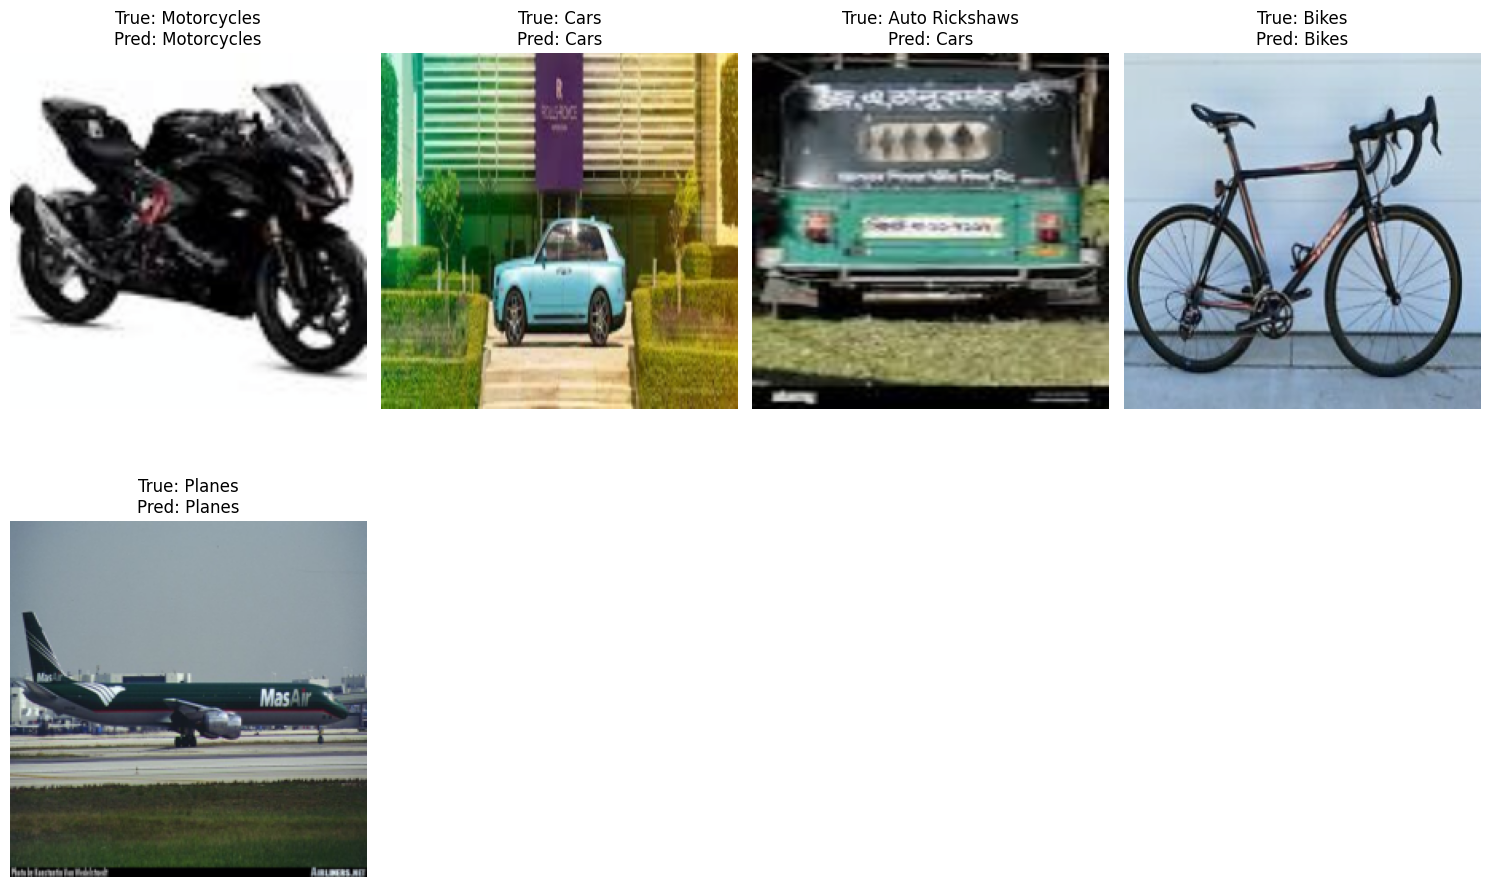

In [31]:
def imshow(inp, title=None):
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp  = std * inp + mean
    inp  = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis('off')

# One image per class
shown_classes = set()
plt.figure(figsize=(15, 10))
i = 1

for img, label in test_dataset:
    class_name = class_names[label]
    if class_name in shown_classes:
        continue
    shown_classes.add(class_name)

    model.eval()
    with torch.no_grad():
        img_input = img.unsqueeze(0)
        output = model(img_input)
        _, pred = torch.max(output, 1)

    plt.subplot(2, 4, i)
    imshow(img, f"True: {class_name}\nPred: {class_names[pred.item()]}")
    i += 1

    if len(shown_classes) == 7:
        break

plt.tight_layout()
plt.show()

In [33]:
model.eval()
#testing on test dataset
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.97%


In [34]:
model.eval()
correct = 0
total = 0
#testing on tain dataset
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images, labels
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 99.47%
